In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Import citypy
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-21.596982385708415 137.88124471000265
12.074503383984478 -35.68472030516452
51.44798702409119 -101.74493814758866
23.2123757666792 -78.31818455474577
64.26830500233493 50.02530239967501
-83.82481041203167 -115.23935465083682
29.98415456392614 103.16387241686715
31.183453464615354 16.367354687661617
-46.97881892601953 130.25466519964613
15.045594232646451 -119.38380106207856
58.5559026646672 91.1091844922887
-54.7988412854556 87.30986018716152
-40.22782435613592 175.50016928049394
-63.321276416573866 -56.91343994797012
66.14366883983823 64.90276474503673
59.719829467580496 168.6018771236233
-24.76181060476405 166.16458884844627
-79.53512488587972 176.84047111940663
60.793922307691105 -12.519143403022412
-30.049516285039232 -127.92604439042464
42.9902357075498 -138.50457860573633
-68.23503869591661 89.02826742136966
68.77016203752478 101.79174320875171
49.30672632441613 -161.9158579931793
-75.16860803055727 87.32552063678463
61.3358582140001 25.92231667609701
39.80630279372656 -61.56488

-33.72125877090138 -73.56338658332007
6.231211921614488 40.405197022317765
-22.523073021583215 9.147190738709753
-87.46048931521365 -77.70919791908766
66.95299311292555 61.957082619345215
34.293486819713834 148.67312355749561
-10.022599792097992 81.33799590524637
-53.75220138685877 83.40984341249134
52.097477220907734 -121.51210643440777
63.08255220091934 -128.42058333596628
75.4575340951196 43.887057996140555
72.48500588123667 43.48619958447213
-82.93662924528851 -50.6487262319871
-24.388472721585515 -124.81306591981854
54.75345108194679 -21.564518099550412
84.21600984325656 -80.85012513339042
52.09648688584929 -170.8159081786548
-76.63150476320544 117.5677439556685
65.87850676038394 139.2079813018044
40.15869974946128 49.418666875327915
-59.154586326156725 35.983169394169664
-82.70010585025588 24.84224751280533
1.6597963524990007 -45.82709583891983
-36.606608120942106 -176.17137576412463
2.1466177538901263 163.77462584284302
27.584153311688993 -72.81586332704278
-50.369629386590105 -

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mount isa
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | kamsack
Processing Record 4 of Set 1 | moron
Processing Record 5 of Set 1 | koslan
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | yaan
Processing Record 8 of Set 1 | surt
Processing Record 9 of Set 1 | port lincoln
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | yeniseysk
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | sanson
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | muzhi
Processing Record 16 of Set 1 | tilichiki
Processing Record 17 of Set 1 | vao
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | hofn
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | port hardy
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | bethel
Processing Record 24 of Set 1 | heinola
Processing Record 25 of Set 1 | ha

Processing Record 41 of Set 4 | mugur-aksy
Processing Record 42 of Set 4 | peniche
Processing Record 43 of Set 4 | paita
Processing Record 44 of Set 4 | rio branco do sul
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | pula
Processing Record 47 of Set 4 | krasnaya poyma
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | afmadu
City not found. Skipping...
Processing Record 50 of Set 4 | luanda
Processing Record 1 of Set 5 | praia
Processing Record 2 of Set 5 | talnakh
Processing Record 3 of Set 5 | tuatapere
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | maniitsoq
Processing Record 6 of Set 5 | kapoeta
Processing Record 7 of Set 5 | mamallapuram
Processing Record 8 of Set 5 | tirat karmel
Processing Record 9 of Set 5 | hualmay
Processing Record 10 of Set 5 | zhicheng
Processing Record 11 of Set 5 | berlevag
Processing Record 12 of Set 5 | geraldton
Processing Record 13 of Set 5 | usinsk
Processing Record 14 of Set 5 | ma

Processing Record 33 of Set 8 | cockburn town
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | novyy urengoy
Processing Record 36 of Set 8 | beira
Processing Record 37 of Set 8 | iquique
Processing Record 38 of Set 8 | bridgetown
Processing Record 39 of Set 8 | xiangdong
City not found. Skipping...
Processing Record 40 of Set 8 | la ronge
Processing Record 41 of Set 8 | spearfish
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | middlebury
Processing Record 44 of Set 8 | amlame
Processing Record 45 of Set 8 | novaya igirma
Processing Record 46 of Set 8 | cairns
Processing Record 47 of Set 8 | sola
Processing Record 48 of Set 8 | plouzane
Processing Record 49 of Set 8 | kizhinga
Processing Record 50 of Set 8 | farafangana
Processing Record 1 of Set 9 | bama
Processing Record 2 of Set 9 | ust-omchug
Processing Record 3 of Set 9 | ust-tsilma
Processing Record 4 of Set 9 | nome
Processing Record 5 of Set 9 | dhidhdhoo
Processing Record 6 of Se

Processing Record 22 of Set 12 | sim
Processing Record 23 of Set 12 | dingle
Processing Record 24 of Set 12 | storforshei
Processing Record 25 of Set 12 | vytegra
Processing Record 26 of Set 12 | guilin
Processing Record 27 of Set 12 | behbahan
Processing Record 28 of Set 12 | puerto leguizamo
Processing Record 29 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 30 of Set 12 | necochea
Processing Record 31 of Set 12 | ayan
Processing Record 32 of Set 12 | uyuni
Processing Record 33 of Set 12 | sabang
Processing Record 34 of Set 12 | half moon bay
Processing Record 35 of Set 12 | narodychi
Processing Record 36 of Set 12 | evensk
Processing Record 37 of Set 12 | pariquera-acu
City not found. Skipping...
Processing Record 38 of Set 12 | ancud
Processing Record 39 of Set 12 | flagstaff
Processing Record 40 of Set 12 | chittur
Processing Record 41 of Set 12 | agadir
Processing Record 42 of Set 12 | halalo
City not found. Skipping...
Processing Record 43 of Set 12 | ust-nera

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mount Isa,AU,2021-03-19 18:17:54,-20.7333,139.5000,78.80,50,98,5.75
1,Sao Filipe,CV,2021-03-19 18:19:49,14.8961,-24.4956,74.73,68,0,6.33
2,Kamsack,CA,2021-03-19 18:19:49,51.5667,-101.9009,44.60,70,1,13.80
3,Moron,AR,2021-03-19 18:19:49,-34.6534,-58.6198,75.99,51,50,5.01
4,Koslan,RU,2021-03-19 18:19:50,63.4564,48.8989,13.86,96,99,4.88


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
#Creating Visualizations

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

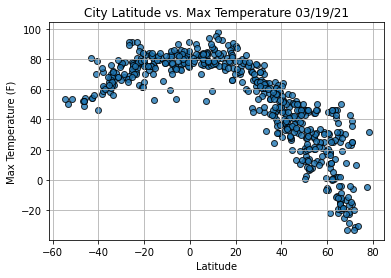

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

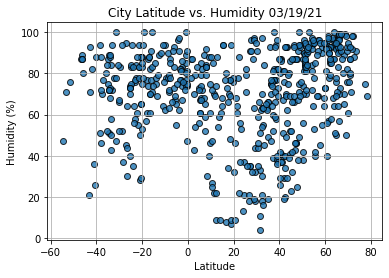

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

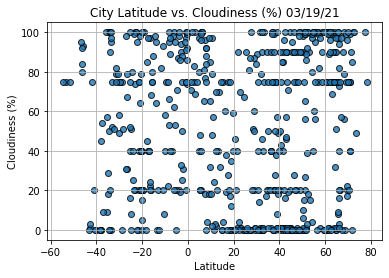

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

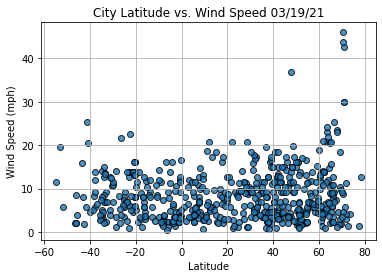

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()